## 5. Globally Stable Subcritical Pitchfork Bifurcation

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

\begin{align}
\dot{u} = f(u,\mu) = -u \left[ \left(u^2 - 1 \right)^2 - \mu -1 \right]
\end{align}

### a)

Fixpoints $u_0$ of the system:

\begin{align*}
u_0 \in \left\{0,\ \pm \sqrt{1 \pm \sqrt{1+\mu}} \right\}
\end{align*}

Derivative of $f(u)$:

\begin{align*}
\frac{df}{du} = \mu - 5 \cdot u^4 + 6 \cdot u^2
\end{align*}

Check stability for each $u_0$, dependent on $\mu$, by looking at the derivative of $f(u,\mu)$ at $u_0$:

\begin{array}{c|c}
u_0 & \frac{df}{du}|_{u_0} & \text{stable} & \text{critical} & \text{unstable} \\ \hline
0 & \mu & \mu < 0 & \mu = 0 & \mu > 0 \\
+\sqrt{1+\sqrt{1+\mu}} & -4\cdot\left(1+\mu+\sqrt{\mu+1}\right) & \mu>-1 & \mu=-1 & \mu<-1 \\
-\sqrt{1+\sqrt{1+\mu}} & -4\cdot\left(1+\mu+\sqrt{\mu+1}\right) & \mu>-1 & \mu=-1 & \mu<-1 \\
+\sqrt{1-\sqrt{1+\mu}} & -4\cdot\left(1+\mu-\sqrt{\mu+1}\right) & \mu>0 & \mu=-1,\ 0 & \mu<0\land \mu\ne-1 \\
-\sqrt{1-\sqrt{1+\mu}} & -4\cdot\left(1+\mu-\sqrt{\mu+1}\right) & \mu>0 & \mu=-1,\ 0 &\mu<0\land \mu\ne-1
\end{array}

### b)

![sketch 1](https://raw.githubusercontent.com/ManshaP/CCEES/master/exercise_1/5_b_1.jpg)
![sketch 2](https://raw.githubusercontent.com/ManshaP/CCEES/master/exercise_1/5_b_2.jpg)

### c)

In [0]:
def subcritical_pitchfork_bifurcation(u, t=None, mu=1.):    
    return -u * ((u**2 - 1)**2 - mu -1)

def u_fix(mu):
    u_i = [0]
    if (1 + mu) >= 0:
        u_i += [+np.sqrt(1 + np.sqrt(1 + mu)),
                -np.sqrt(1 + np.sqrt(1 + mu))]
        if (1 - np.sqrt(1 + mu)) >= 0:
            u_i += [+np.sqrt(1 - np.sqrt(1 + mu)),
                    -np.sqrt(1 - np.sqrt(1 + mu))]
        
    stability = []
    for u in u_i:
        deriv = mu - 5 * u**4 + 6 * u**2
        if deriv < 0:
            stability.append(-1)
        elif deriv > 0:
            stability.append(1)
        else:
            stability.append(0)
    
    return list(map(list, zip(*[u_i, stability])))

In [0]:
t_range = np.linspace(0, 1, 10000)
mus = [-1.5, -1, -.5, 0, .5]
u0s = np.linspace(-30, 30, 300)
scenario = {}
for mu in mus:
    scenario[mu] = {}
    for u0 in u0s:
        sol = odeint(subcritical_pitchfork_bifurcation, u0, t_range, args=(mu,))
        scenario[mu][u0] = sol[:,0]

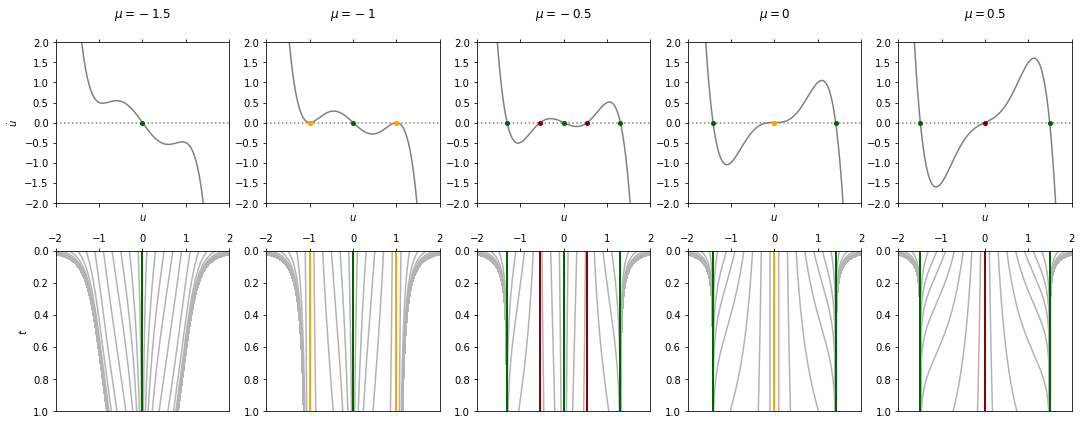

In [0]:
axs = {}
n_mu = len(mus)
colors = {-1:'darkgreen', 0:'orange', 1:'darkred'}
u_range = np.linspace(-2, 2, 100)

fig = plt.figure()

for i, mu in enumerate(mus):
    axs[(mu,'t')] = plt.subplot2grid((2, n_mu), (1, i))
    axs[(mu,'u')] = plt.subplot2grid((2, n_mu), (0, i))
    axs[(mu,'u')].set_title(r'$\mu={}$'.format(mu), pad=25)
    
for mu, solutions in scenario.items():
    fix_points = u_fix(mu)
    
    axs[(mu,'u')].plot(u_range, subcritical_pitchfork_bifurcation(u_range, mu=mu), color='0.5')
    axs[(mu,'u')].plot((u_range[0], u_range[-1]), (0, 0), color='0.5', linestyle=':')
    axs[(mu,'u')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'u')].set_ylim(-2, 2)
    
    for n0, solution in solutions.items():
        axs[(mu,'t')].plot(solution, t_range, label=r'$n_0={}$'.format(n0), color='0.7')
        
    for fix, stab in fix_points:
        c = colors[stab]
        axs[(mu,'t')].plot((fix, fix), (t_range[0], t_range[-1]), color=c, linewidth=2)
        axs[(mu,'u')].plot(fix, 0, marker='.', color=c, markersize=8)
        
    axs[(mu,'t')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'t')].set_ylim(0, t_range[-1])
    axs[(mu,'t')].invert_yaxis()
    axs[(mu,'u')].set_xlabel(r'$u$', labelpad=10)
    axs[(mu,'t')].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axs[(mu,'u')].tick_params(top=True, labeltop=False, bottom=True, labelbottom=False)
    
axs[(mus[0],'t')].set_ylabel(r'$t$')
axs[(mus[0],'u')].set_ylabel(r'$\dot{u}$')

fig.set_size_inches(n_mu*3, 6)
fig.tight_layout()
plt.show()